# Using Pandas

This is an introduction to the use of `Pandas` with an eye toward the functions we'll use in this class. 

`Pandas` is another library for Python with tools for handling and operating on data.  It particularly excels at the type of data we might usually expect to find in flat text files, CSV files, and Excel spreadsheets.  It also has a powerful data structure called a `DataFrame` that streamlines the process of data handling and manipulation and time series analysis.  

This notebook introduces you to some of the main functionality of `Pandas`.  The first thing we'll do is import the `Pandas` library, following standard Python conventions:

In [ ]:
import pandas as pd
import numpy as np # let's also get NumPy, since we often need it

## Reading in data

One of the first things we'll use `Pandas` for in this class is to read data into our notebooks.  `Pandas` provides simple input functions for CSV, Excel, HTML, and [many others](https://pandas.pydata.org/docs/user_guide/io.html).  I've provides a very simple Excel file and CSV file in the directory where this notebook resides.  Note that if you need to see the contents of your current directory, you can make an external system call and `!ls`.  

In [ ]:
!ls # using '!' makes a call out of the notebook into your system (terminal), where `ls` lists the files in your directory

Alternatively, you can use [the `os` library](https://docs.python.org/3/library/os.html), which contains Python methods for accessing information from your operating system, including things like directory listings:

In [ ]:
import os
os.listdir(os.curdir)


OK, let's use `Pandas` and read in some data.  You can see the full description of [`pd.read_excel` here](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html), and [`pd.read_csv` here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Note that `pd.read_excel` might give you a non-fatal (informational) warning if you are using the more modern `.xlsx` suffix. 

In [ ]:
excel_data = pd.read_excel('mySimpleExcelFile.xls') 
text_data = pd.read_csv('myData.csv')

Let's take a look at our Excel data, first.  If we ask Python what type of variable `excel_data` is, it tells us it is a DataFrame from `Pandas`.

In [ ]:
type(excel_data)

We can look at this DataFrame simply by typing the variable name on its own line:

In [ ]:
excel_data

You'll note a few things.  First, the print to screen is formatted nicely - for the DataFrame type or object, this is the default display behavior - nicer than most of what we've seen thus far in Python.  Similar to Excel, we see that the columns have labels.  Each row of numeric data also has an index value, starting from 0. 


Let's pause for a minute and look at the various elements of a DataFrame object: 

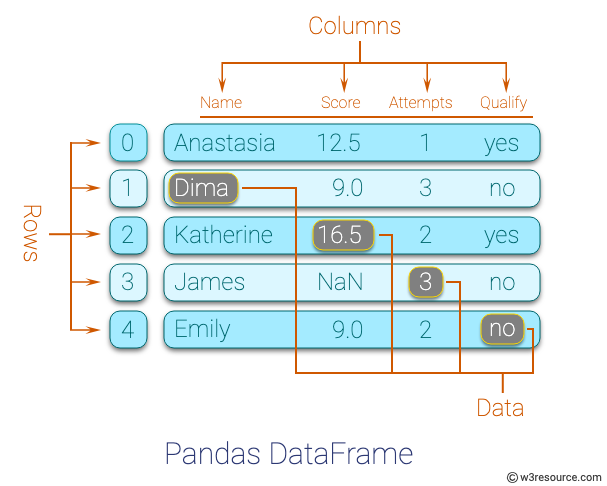

The DataFrame has a two dimensional form like an Excel spreadsheet.  Your columns (`.columns`) have names, which can be used (as we'll see) to refer or index directly to that column of data.  Each column of data and it's name can be thought of as a `DataSeries` or Pandas `Series`, which we may operate on individually (like a vector of numbers, for instance).  Each row has (by default) a number we can use to refer or `.index` to it.  In the section below, we'll learn how to slice, dice, and manipulate DataFrames using these features. 

Pandas also allows you to mix different types of columns.  Here we've got all integers, but as we'll see you can mix Series of different data types. You can use the method `.dtypes` to look at what data types each column is:

In [ ]:
excel_data.dtypes


## Viewing DataFrames

For large datasets, you might want to only look at the top or bottom of the DataFrame, which can be accomplished with `.head()` and `.tail()` methods.  Of course, for our very tiny example dataset, it won't make much of a difference:

In [ ]:
excel_data.head()


In [ ]:
excel_data.tail()


We can also look just at the names of the columns, by calling the `.columns` method on the DataFrame:

In [ ]:
excel_data.columns

We can also look at the `.index` values -- we can think of these as row numbers as in the diagram above, just like we designate row numbers in Excel.  Of course, by default, here in Python these start with zero:

In [ ]:
excel_data.index # printing this will show the starting value, the last value, and the step distance between them

If you want to actually list all the `.index` values, you can append `.values` to the `.index` like this:

In [ ]:
excel_data.index.values

For either `.index` or `.columns`, you can wrap the `.values` call in a `list()` to get a list in return

In [ ]:
list(excel_data.columns.values), type(list(excel_data.columns.values),)

Calling the `.describe()` method on our DataFrame gives us some summary statistics by column - we can see the number of values, their mean, standard deviation, min, max, and some quantiles.  This can be useful as a check that we have brought in the data correctly:

In [ ]:
excel_data.describe()


## Sorting DataFrames

One of the strengths of Pandas is that it provides us lots of tools we can use to manipulate and manage our tabular data. For instance, we can sort using our index values (the row numbers) using `.sort_index`, and specifying ascending or descending and which axis to sort along:

In [ ]:
excel_data.sort_index(axis=0,ascending=False)

We can also sort by the values in the DataFrame, and specify which column to use (similar to how we might do in Excel) to do this sorting.  Here, for example, we sort by the values in the column "score" and the default is to sort from low to high.  Notice how the rest of the DataFrame is sorted accordingly, too.  You can see this most clearly in how the index values are no longer in numerical order: 

In [ ]:
excel_data.sort_values(by="score")

In [ ]:
excel_data.sort_index

These are only a few of the ways you can sort or change the orientation or position of your DataFrame data.  We'll encounter others later in the class. 

## Indexing and Selecting Data

Pandas [provides powerful ways to index and select sets and subsets of your data](https://pandas.pydata.org/docs/user_guide/indexing.html).  Since we can refer to the columns by name and the rows by their index value, here are a few common ones:

First, we can refer to columns by their names, and use this to operate on the columns, extract them out to other variables (Panda series, etc.).  For instance, we could pull the 'accuracy' column out of our DataFrame and assign it to it's own Pandas series called 'accuracy':

In [ ]:
excel_data["accuracy"]
accuracy = excel_data["accuracy"] # if you look, this is now a Pandas Series of length 5

We can also refer to the _rows_ by their `.index` _values_ - for instance, here we look at the first two rows (following Pythonic zero-indexing logic):

In [ ]:
excel_data[0:2] # get rows using Python counting logic

If we want to do something sto rows and columns together, the `.loc[]` method also allows us to refer to rows by their position (again, zero-indexed) of our DataFrame.  Here for the `.columns`, we use a `:` to mean 'all columns:

In [ ]:
excel_data.loc[0:2,:] # get rows by their location (index, in this case)

If we want to get just a specific set of columns (series), we can refer to them by name in quotation marks using `.loc`:

In [ ]:
excel_data.loc[:,["position","accuracy"]] # get columns by location, using names

Another example:

In [ ]:
excel_data.loc[1:3,["accuracy","score"]] # get columns and rows by location, using names

Note that `.loc` accepts row numbers and column names, but not column numbers or position.  For that, we need a different command.

A variant on `.loc[]` is `.iloc[]` which allows us to refer to columns and rows by their position or numerical location, e.g. '0th column'

In [ ]:
excel_data.iloc[:,0] # this selects column 1, which is the "position" column, and returns it as a Series - note the 'position' name at the bottom of the list

... or 'the zero-th row':

In [ ]:
excel_data.iloc[0,:] # this selects by the position of index value 0, or as normal people would say 'the first row' ugh

We can also slice and dice our DataFrame based on its internal characteristics.  For instance, the code below selects only the rows of the DataFrame where the value in the "accuracy" column is less than or equal to 3:

In [ ]:
excel_data[excel_data["accuracy"]<=3] # get and return the the DataFrame only where accuracy is <= 3

We can also readily add data to our DataFrame - here I add another column of data, call it 'velocity' and specify the strings it contains.  Note how the DataFrame allows us to mix numeric and string data types in this way as well:

In [ ]:
excel_data["velocity"] = ["fast", "slow", "medium", "slow", "medium"]
excel_data

## 'Missing Data'

One very nice feature of Pandas is that it provides us with a host of tools for dealing with missing data (NaN).  

You can see more of the ways of working with missing data in Pandas here: https://pandas.pydata.org/docs/user_guide/missing_data.html

Let's add a missing data point into our current DataFrame, replacing the value of '39' in the data column (index 2, column 1) with NaN, using `np.nan` to do this:

In [ ]:
excel_data.iloc[2,1] = np.nan # we replace the data value of 39 in the accuracy column with a NaN using Numpy's NaN command
excel_data

The [`.dropna()` allows us to exclude rows of data where NaNs are present](https://pandas.pydata.org/docs/user_guide/missing_data.html#dropping-axis-labels-with-missing-data-dropna).  In the example below, we tell Pandas to ignore `any` row where _any_ of the values are NaN (we could also specify `all` if we wanted to only exclude those rows where _all_ the data were missing):

In [ ]:
excel_data.dropna(how="any") # row with missing "accuracy" entry is not displayed

We can also easily replace or [fill NaN values with other values using `.fillna()`](https://pandas.pydata.org/docs/user_guide/missing_data.html#filling-missing-values-fillna):

In [ ]:
excel_data.fillna(9999) # fills missing data with 9999

We can also get a Boolean mask that tells us where data are missing using Panda's command `.isna()`:

In [ ]:
pd.isna(excel_data) # boolean mask where data are missing

Or where data AREN'T missing, using `.notna()`:

In [ ]:
pd.notna(excel_data) # boolean mask where data are not missing

## Statistics in `Pandas`

Here we'll look at some very basic statistical functionality in Pandas.  We'll return to this topic when we need to acquire additional tools to deal with our data.

First, I'm going to drop the 'velocity' column of strings I added above, just for simplicity.  There are a few ways to remove a column from our DataFrame using `.drop()`.  If you also specify `inplace=True`, Pandas will remove the column in the DataFrame without the need to reassign the output. 

In [ ]:
excel_data.drop(columns=["velocity"],inplace=True) # or, alternatively: excel_data = excel_data.drop(columns=["velocity"]) 
excel_data

We can easily take a sum down the columns using `.sum()`:

In [ ]:
excel_data.sum()

Similarly, [a range of other summarizing statistics are available](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html), including the `.mean()':

In [ ]:
excel_data.mean()

In Pandas, we can also specify the dimension (or axis) along which we wish to calculate the statistics.  

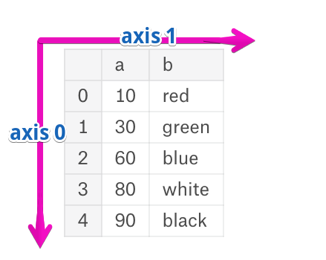

If we want to calculate for instance the mean of each _row_, we can specify `axis=1`:

In [ ]:
excel_data.mean(axis=1) # mean across the columns using axis=1 (the mean of each row)

As we go through the class, we'll look at other specific examples of how to use Pandas for our needs.  If you'd like to learn more right now, there are some very useful tutorials here:

https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html

### Working with time series

We'll sometimes be dealing with data that has a time dimension -- e.g. our data were gathered or measured or reported at a specific time, and that time (and order) may have meaning.  Pandas has specific `datetime` functionality that can be quite useful for this purpose.   Let's see some examples of this.  I've provided a simple CSV file with daily water discharge data (in units of daily mean cubic feet per second discharge) for Boulder Creek, Colorado. We can use `pd.read_csv` as we did before to read these data into a Pandas DataFrame, but if we also specify `parse_dates` and indicate the name of the column in the CSV file which contains dates, Pandas will attempt to use this as the index for the DataFrame and consider it a datetime object. 

More details on this are available here: https://pandas.pydata.org/docs/user_guide/timeseries.html

First, we import [datatime](https://docs.python.org/3/library/datetime.html), then we call Pandas `pd.read_csv` and specify that the column named 'date' in the CSV file is to be the datetime index: 

In [ ]:
import datetime

df = pd.read_csv('BoulderCreekDischarge.csv',parse_dates=['date'])
print(df.info())


You can see that the type of column 'date' is `datetime64`, indicating that Python recognizes this field as having time and date properties up to a [64-bit integer](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.datetime64). `

There are many cool things we might do with this.  This makes available a set of `DataFrame.dt.function())` methods that allow us to work with time and dates directly, which can be difficult otherwise (e.g. which months have how many days? which years have 365 or 366 days? etc.)

For instance, we can ask Pandas which dates correspond to a month named 'Janaury' and store the resulting Boolean (True or False) in a Pandas series called my_index:

In [ ]:
my_index = df["date"].dt.month_name()=='January'
print(my_index)

We could then ask Pandas to only show us those values in the DataFrame that correspond to January, using that index:

In [ ]:
df[my_index]

Looking at the output above, you see that there are 1116 rows returned - these are the rows of the daily data in DataFrame `df` that are January!  How cool is that? 

There is a Pandas tutorial on handling DateTime here: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html#

We could use this functionality, for instance, to `resample` out DataFrame from daily to monthly resolution.  The various time aliases that Pandas uses are here: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases.  

Below, let's resample from daily to monthly data.  We use `.set_index()` to tell Pandas to use 'date' as the index (not the row numbers).  Then, we tell 'resample()' to look at 1 month ('1M') and to calculate a mean.


In [ ]:
# resample to 1 monthly means from daily data:
monthly_discharge = df.set_index('date').resample('1M').mean()  # here we strung together all the commands in one line of code!
monthly_discharge


You can see we now have only 432 columns, which is the number of months in our data set.   

## Simple plotting with Matplotlib

`Matplotlib` is a popular as well as powerful library for creating plots (and maps, which we'll learn about later) in Python.  Although there are other plotting options in the Python ecoystem (and you are welcome to use them!), the examples I'll provide in this class with use this package.   The package has so many options and capabilities is would be challenging to even scratch the surface, but we'll look at many aspects of its functionality later int he course.  If you want to learn more about Matplotlib right now, though, you can see the tutorials that the developers provide here: https://matplotlib.org/stable/tutorials/index.html

For now, let's import the core of `matplotlib` as `mpl` and separately the specific `matplotlib.pyplot` library as `plt`, which provides direct access to the pyplot capabilities:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Let's make a simple `matplotlib` plot to see our monthly mean discharge data:

In [ ]:
fig, ax = plt.subplots() # Create a figure called 'fig' and a handle to the single figure axes called 'ax' 
ax.plot(monthly_discharge, label='Monthly Discharge',color='blue',linewidth=1)  # plot the monthly discharge
ax.set_xlabel('Time') # label the x axis
ax.set_ylabel('Mean Month Discharge (cubic feet per second )') # label the y axis
plt.show()  # show the plot in the notebook


Pretty cool, huh?  What about if we wanted to see an annual average? 

In [ ]:
annual_discharge = df.set_index('date').resample('1A').mean()
annual_discharge # annual values from 1987 to 2022!


In [ ]:
fig, ax = plt.subplots()  # to get the axis (ax) object
ax.plot(annual_discharge, label='Monthly Discharge', color='blue', linewidth=1)  # plot the annual average discharge
ax.set_xlabel('Year')
ax.set_ylabel('Mean Annual Discharge (cubic feet per second )')
plt.show()  # show the plot


Depending on our data, we'll be able to call on Pandas to get our data into Python, manipulate it according to column names or index values (including datatime), create temporal averages, and much more.  We'll continue to learn bits and pieces of Pandas functionality as we go along. 